<h2 style = "color : Brown"> BIKE SHARING ASSIGNMENT </h2>

#### PROBLEM STATEMENT :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

##### Goal:
Model the demand for shared bikes with the available independent variables.

1. It will be used by the management to understand how exactly the demands vary with different features.
2. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

> The model will be a good way for management to understand the demand dynamics of a new market.

### _STEP 1. Reading And Understanding The Data_

In [1]:
# Importing the requires libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Displaying all columns
pd.set_option('display.max_columns',200)

In [2]:
# Surpress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number of rows and columns in the dataframe

bike.shape

(730, 16)

In [5]:
# Checking the data types and the column-wise info in the data frame

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the numeric columns in the dataframe

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Listing of all the columns

list(bike.describe().columns)

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

**_Checking the Null values in the dataframe_**

In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> There are no Null values in the dataset

In [9]:
# Converting to Date Time

bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['dteday'].dtypes

dtype('<M8[ns]')

In [10]:
# Mapping the Season column
def map_season(x):
    return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike[['season']] = bike[['season']].apply(map_season)

# Mapping the Month column
def map_month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike[['mnth']] = bike[['mnth']].apply(map_month)

# Mapping the Weathersit column
def map_weathersit(x):
    return x.map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Snow'})
bike[['weathersit']] = bike[['weathersit']].apply(map_weathersit)

# Mapping the Weekday column
def map_weekday(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike[['weekday']] = bike[['weekday']].apply(map_weekday)

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Categorical Columns

bike_categorical = bike.select_dtypes(exclude=['float64', 'int64', 'datetime64'])
bike_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [12]:
# Numerical Columns

bike_numerical = bike.select_dtypes(exclude=['object','datetime64'])
bike_numerical.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

### _STEP 2. Data Visualisation_

### Numerical Variables


In [13]:
bike_numerical.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

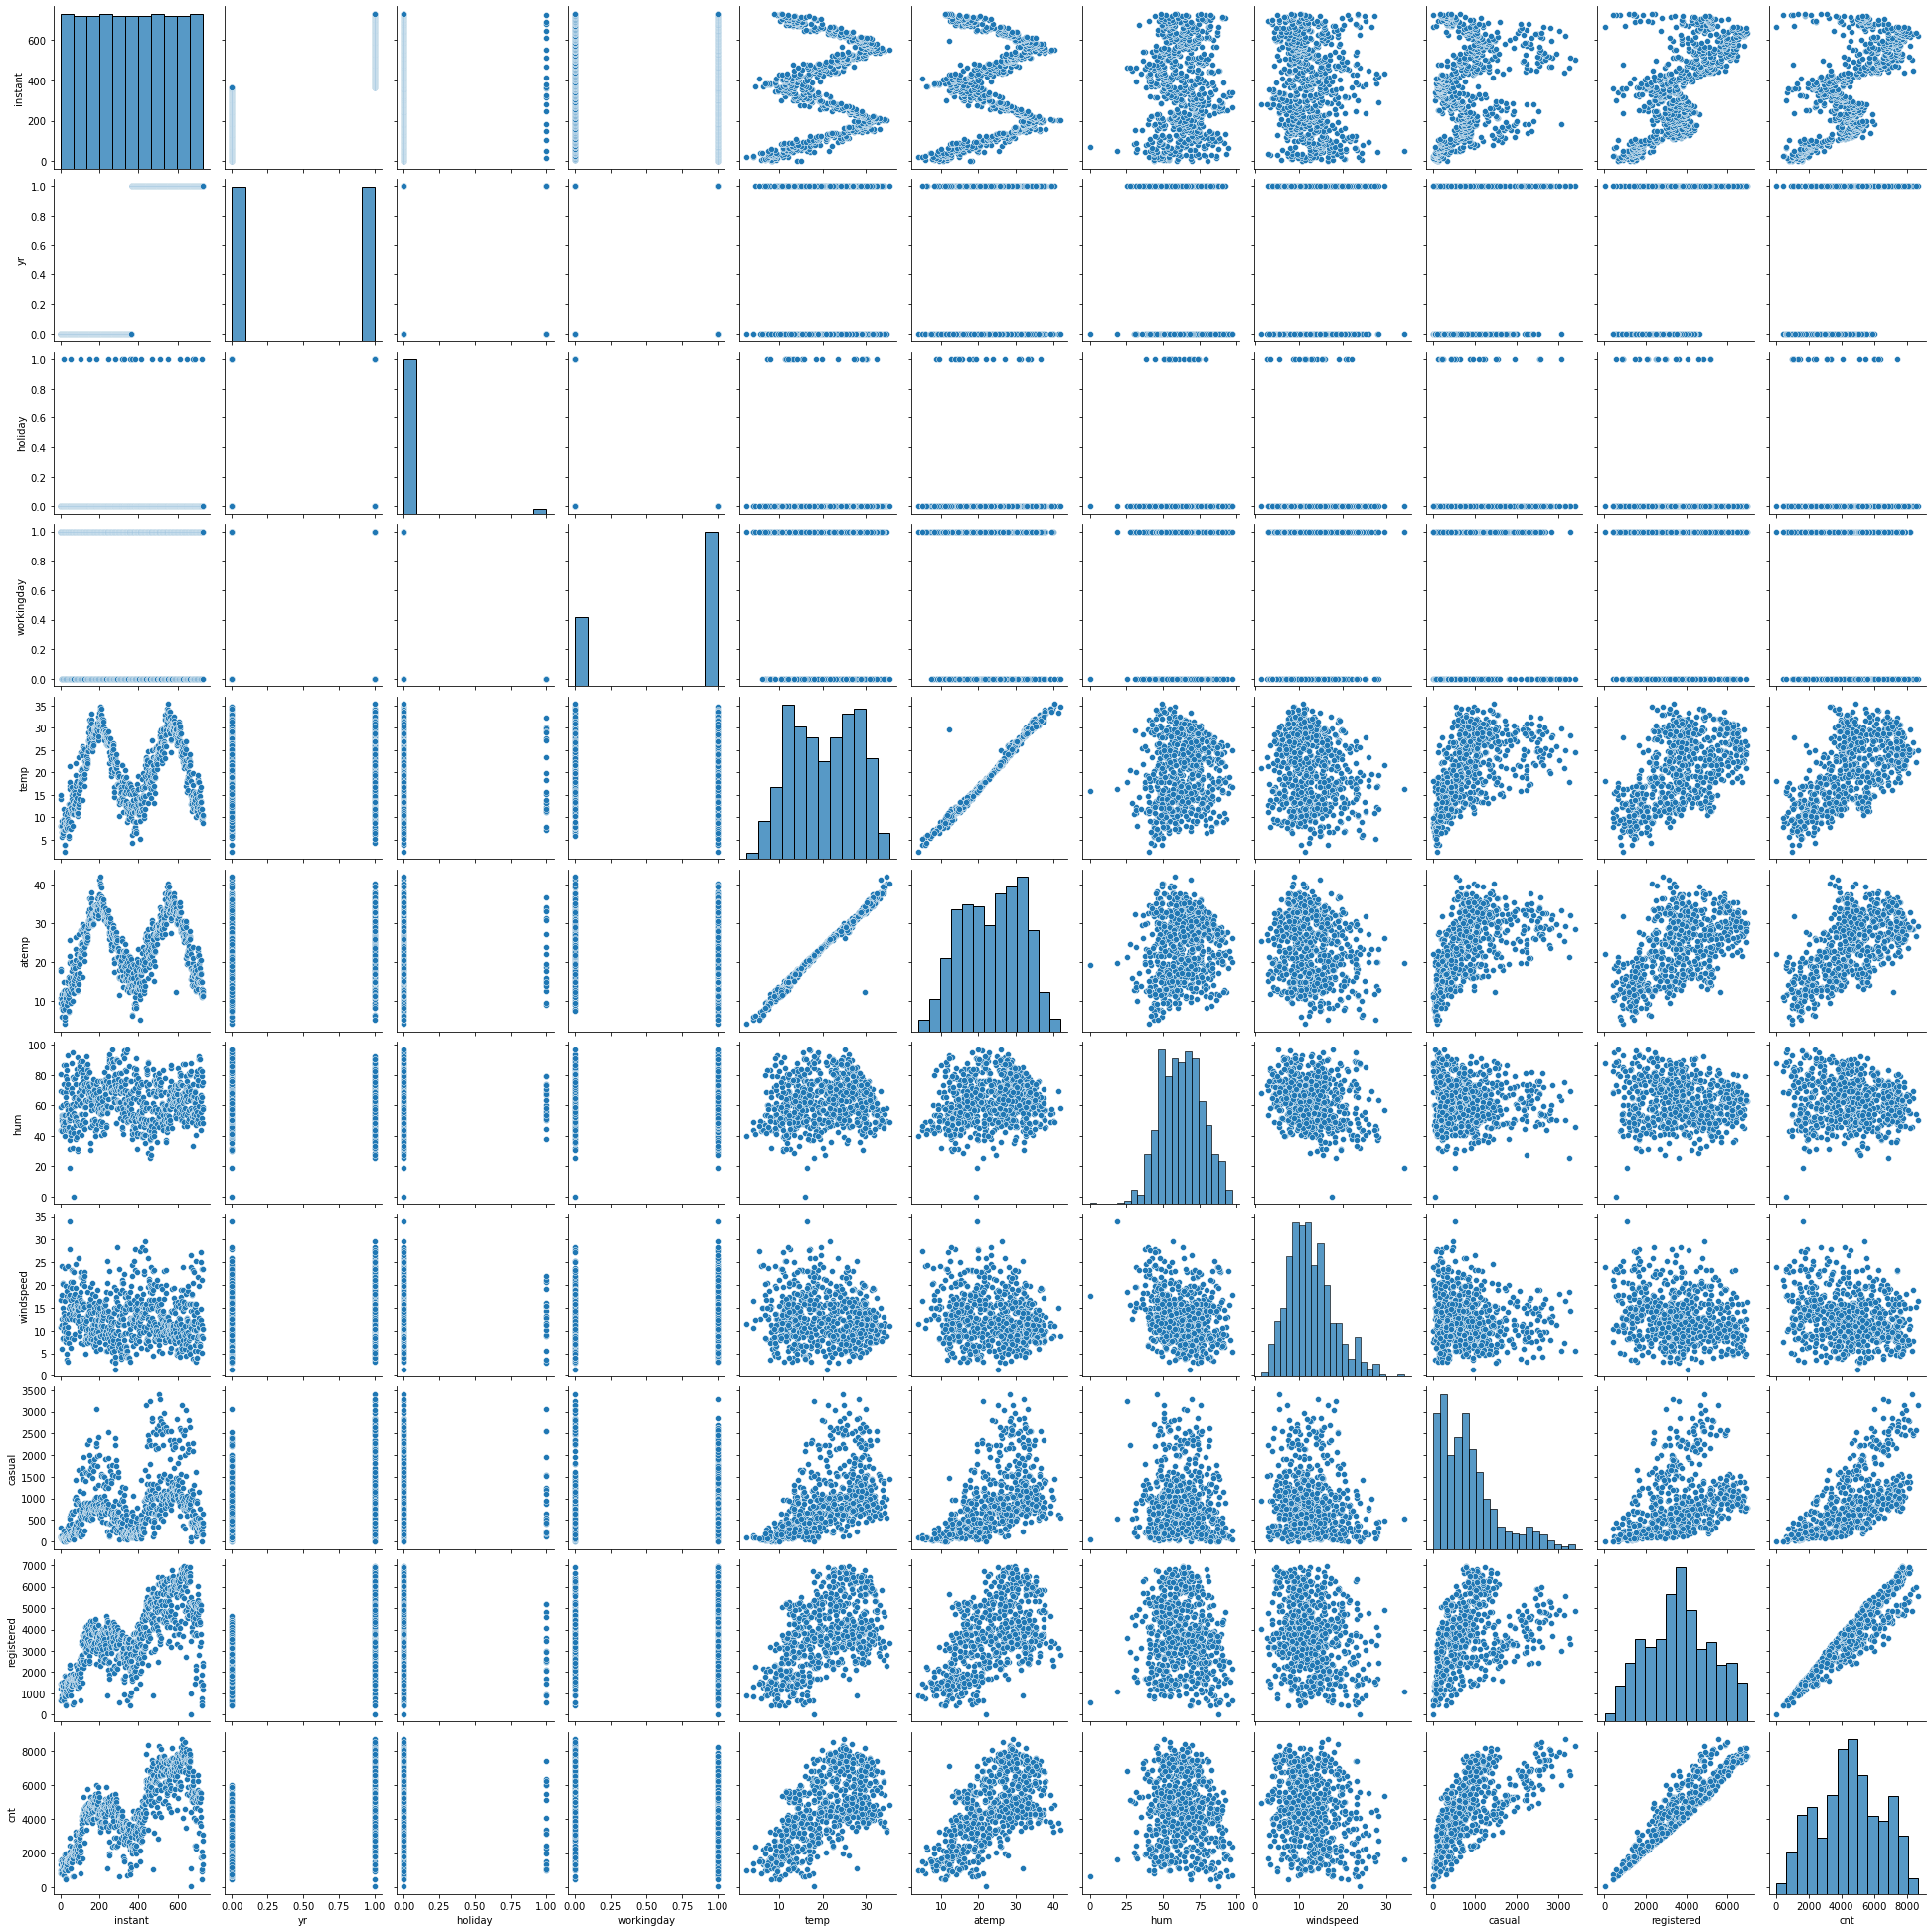

In [14]:
# Plotting pair plot for all of the numerical variables

sns.pairplot(data = bike, vars = bike_numerical)
plt.show()

### Analysing Numerical variables

`1. Temperature`

In [15]:
bike['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

> The mean value for the `Temperature / temp` is 20.3193, and the median is 20.4658 while the max temp is 35.328.

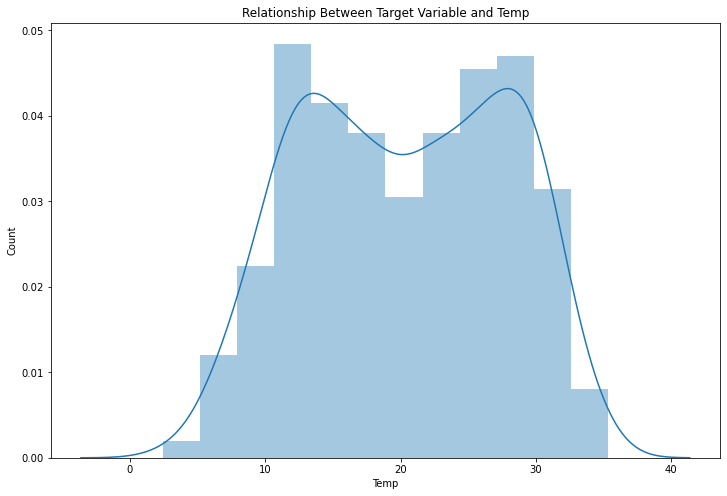

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(bike['temp'])

plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Relationship Between Target Variable and Temp')

plt.show()

**Inferences:**
> There are positive relationship between the `Temperature` and the Target Variable. However once the temperature are in range of 10-15, 25-30, the demand has started reducing.

`2. Atemp/ Adjusted Temperature`

In [17]:
bike['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

> For the `Adjusted Temperature/ Atemp`, the mean temperature lies in 23.726, median at 24.368, and max temperature at 42.044.

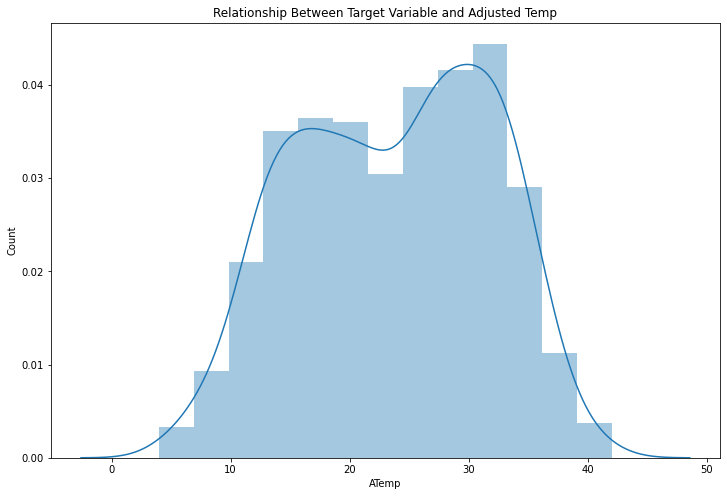

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(bike['atemp'])

plt.xlabel('ATemp')
plt.ylabel('Count')
plt.title('Relationship Between Target Variable and Adjusted Temp')
plt.show()

**Inferences:**
> There are direct relationship between `Adjusted temperature` and the Target Variable, however once the Adjusted Temperature reached 30, the count has started reducing.

`3. Humidity/Hum`

In [19]:
bike['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

> For the `humidity/ hum`, the mean is 62.765, median is at 62.625 and max humidity is at 97.25.

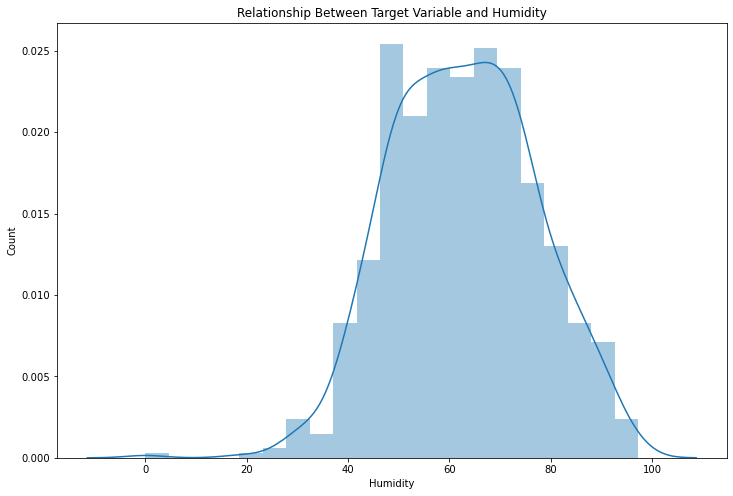

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(bike['hum'])

plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Relationship Between Target Variable and Humidity')

plt.show()

**Inferences:**
> High Demands are there within the `Humidity/ hum` range of 40-80.

`4. Wind Speed`

In [21]:
bike['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

> The mean for the variable `windspeed` is 12.7636, median is at 12.1253 and max is at 34.00


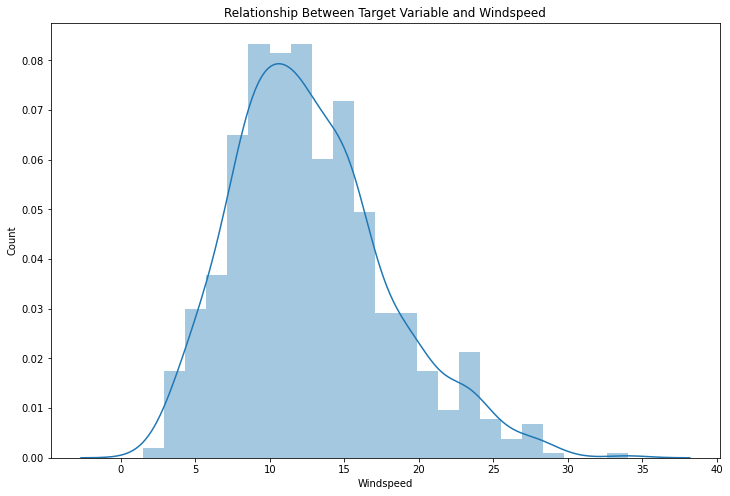

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(bike['windspeed'])

plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.title('Relationship Between Target Variable and Windspeed')

plt.show()

**Inferences:**
> There more more concentrations of the Target Variable(cnt) within the `windspeed` range of 5-20.

### Checking the Outliers for the Numerical Column

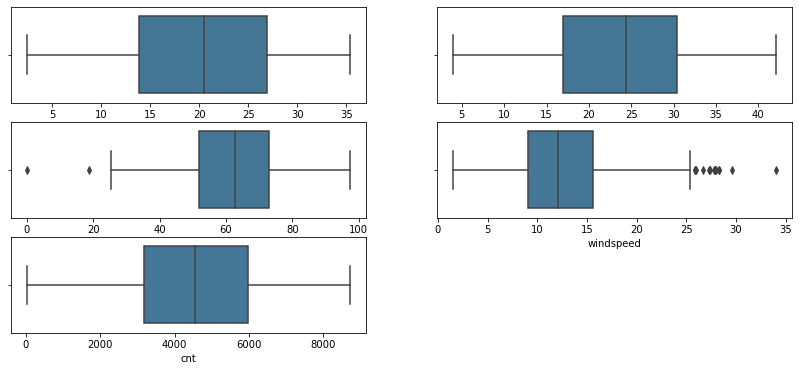

In [23]:
num = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(14,6))

for i in enumerate(num):
    plt.subplot(3,2, i[0]+1)
    sns.boxplot(x = i[1], data = bike, palette='mako')

**Inferences:**
> There are no outliers for cnt, temp and atemp, however, few outliers are there in the humidity (hum) variable and many outliers presents in the windspeed column.

### Categorical Variables

In [24]:
bike_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

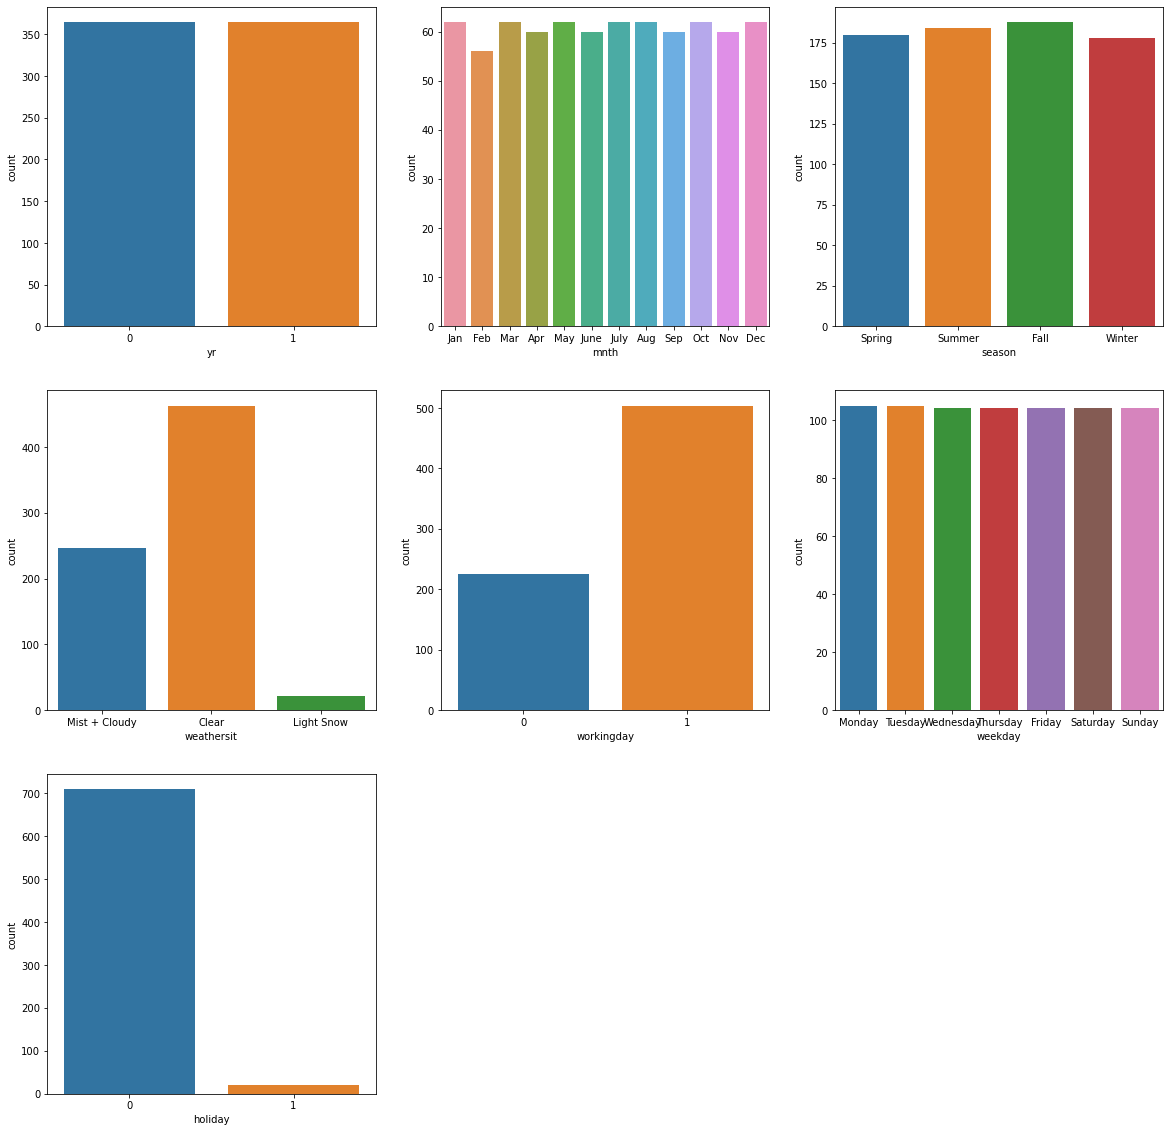

In [25]:
# Visualisation of the categorical variables

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.countplot(x = 'yr', data = bike)
plt.subplot(3,3,2)
sns.countplot(x='mnth', data = bike)
plt.subplot(3,3,3)
sns.countplot(x='season', data = bike)
plt.subplot(3,3,4)
sns.countplot(x='weathersit', data = bike)
plt.subplot(3,3,5)
sns.countplot(x='workingday', data = bike)
plt.subplot(3,3,6)
sns.countplot(x='weekday', data = bike)
plt.subplot(3,3,7)
sns.countplot(x='holiday', data = bike)

plt.show()

### Analysing Categorical variables

`1. Year`

In [26]:
# Checking the value for the 'Year' column

bike['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

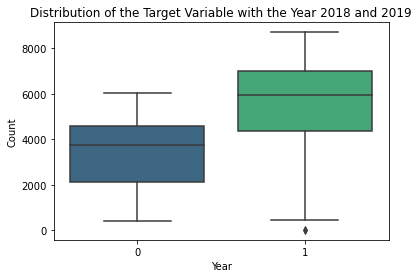

In [27]:
sns.boxplot('yr','cnt', data = bike, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with the Year 2018 and 2019')


plt.show()

**Inferences:**
> The demand for the year 2019 is far greater than the demand for the year 2018. There are outliers for the year 2019.

`2. Month`

In [28]:
# Checking the value for the Month column

bike['mnth'].value_counts()

Oct     62
Aug     62
July    62
Dec     62
Mar     62
Jan     62
May     62
June    60
Sep     60
Apr     60
Nov     60
Feb     56
Name: mnth, dtype: int64

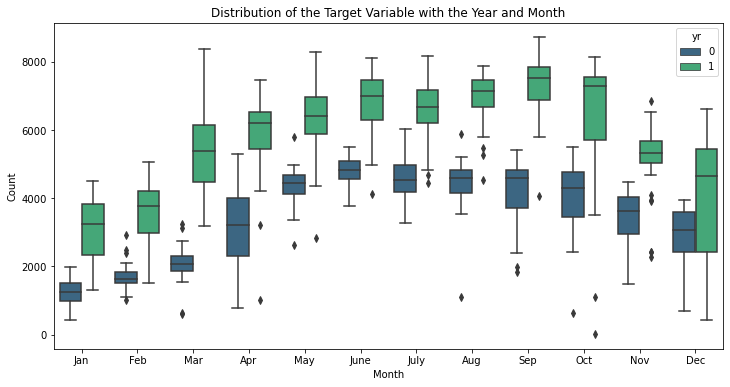

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot('mnth','cnt',hue='yr', data = bike, palette='viridis')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with the Year and Month')


plt.show()

**Inferences:**
> As we can see the demand is increasing in the mid-year starting from the month of Mar to Oct and slowly decreasing from the month of Nov and Dec. We can see that there any outliers in almost every month in the dataset.

`3. Season`

In [30]:
# Checking the value for the Season column

bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

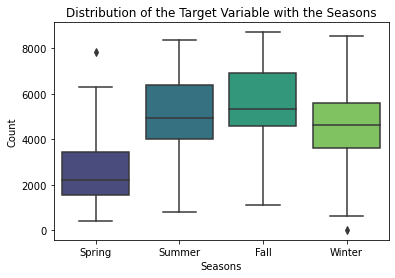

In [31]:
sns.boxplot('season','cnt', data = bike, palette='viridis')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with the Seasons')



plt.show()

**Inferences:**
> During Summer and Fall season, there is an increase number of demand from the above graph. Followed by Winter and Spring. There are outliers for the season of Spring and Winter.

`4. Weekday`

In [32]:
# Checking the value for the weekday column

bike['weekday'].value_counts()

Tuesday      105
Monday       105
Thursday     104
Sunday       104
Saturday     104
Wednesday    104
Friday       104
Name: weekday, dtype: int64

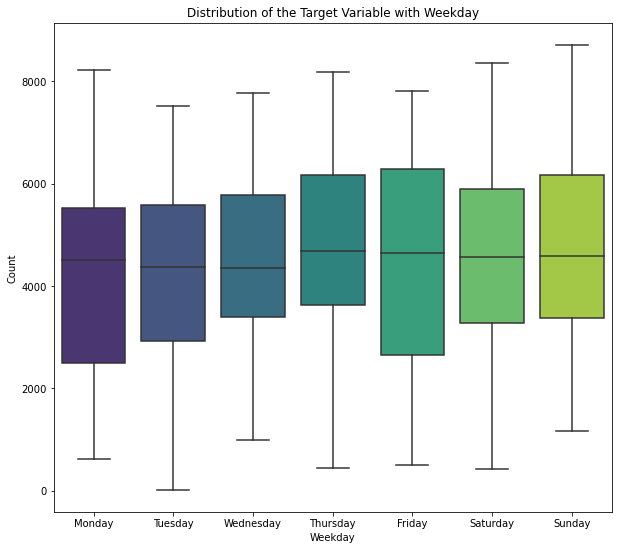

In [33]:
plt.figure(figsize=[10,9])
sns.boxplot('weekday','cnt', data = bike, palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with Weekday')


plt.show()

**Inferences:**
> The demand for the bike rental is almost equally distributed among the days of the weeks, however slightly higher on Thursday and Friday as compared with the other days.

`5. WorkingDay`

In [34]:
# Checking the value for the Working Day column

bike['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

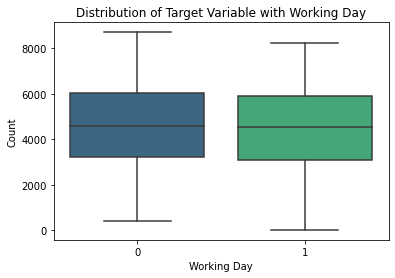

In [35]:
sns.boxplot('workingday','cnt', data = bike, palette='viridis')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Distribution of Target Variable with Working Day')


plt.show()

**Inferences:**
> For working day or non-working day, there nare not much of differences in the demand of the bike rental.

`6. Weathersit`

In [36]:
# Checking the value for the Weathersit column

bike['weathersit'].value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

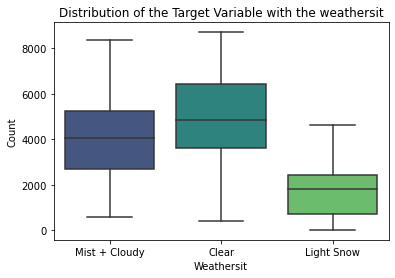

In [37]:
sns.boxplot('weathersit','cnt', data = bike, palette='viridis')
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with the weathersit')


plt.show()

**Inferences:**
> On a Clear weather, we can see a significant increment on teh demand, followed by Mist + Cloudy weather and very few demand during the Light Snow.

`7. Holiday`

In [38]:
# Checking the value for the Holiday column

bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

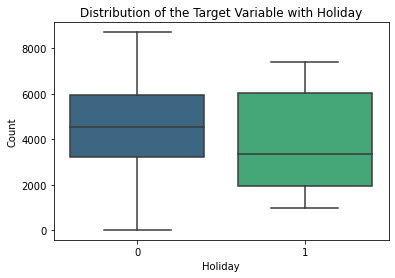

In [39]:
sns.boxplot('holiday','cnt', data = bike, palette='viridis')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable with Holiday')


plt.show()

### Dropping the unnecessary and redundant columns

In [40]:
# Drop the instant column as it is an index column

bike.drop(['instant'], axis=1, inplace=True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the Correlations

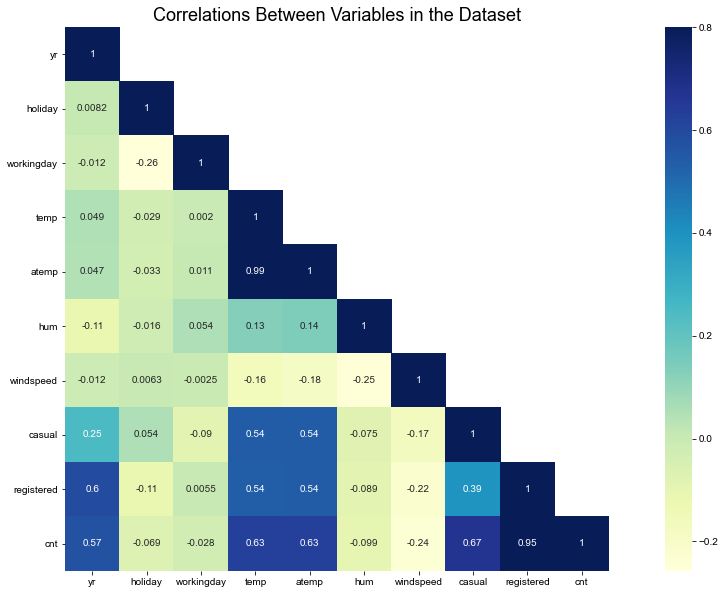

In [41]:
# Checking the correlation between variables

plt.figure(figsize=(20,10))
mask = np.array(bike.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bike.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables in the Dataset')
plt.show()

**Inferences:**

From the above heatmap, we can see there is a high correlation between Temp and Atemp column. Thus in our next step, we shall drop either 1 of the column before proceed further with our analysis.

Also, there are positive correlation for our **`Target variable/ Cnt `** with the columns below:
* Registered
* Temp
* Atemp
* Casual
* Yr

The negative correlations with our **`Target variable/ Cnt `** can be seen with the columns:
* Holiday
* Workingday
* Hum
* Windspeed

### Dropping the unnecessary and redundant columns

In [42]:
# Dropping the atemp column based on the high correlation of 0.99 with temp 

bike.drop(['atemp'], axis=1, inplace=True)

# Dropping the casual and registered column as the total is the value for our target variable

bike.drop(['casual'], axis=1, inplace=True)
bike.drop(['registered'], axis=1, inplace=True)

#Dropping the dteday column as the yr and mnth columns are available

bike.drop(['dteday'], axis=1, inplace=True)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [43]:
# Checking the number of rows and columns

bike.shape

(730, 11)

### _Step 3: Data Preparation_

### Dummy Variables

In [44]:
# Checking the data type for season, month, weekday and weathersit columns

bike[['season','mnth','weekday','weathersit']].dtypes

season        object
mnth          object
weekday       object
weathersit    object
dtype: object

> It is important to ensure that the data types of these 4 variables are 'object' data types, before we create our dummy variable.

In [45]:
# Creating the dummy variables for season, mnth, weekday and weathersit columns

seasons = pd.get_dummies(bike['season'], drop_first=True)
months = pd.get_dummies(bike['mnth'], drop_first=True)
weekdays = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)

In [46]:
# Concatenate the dummy variables to the original dataframe

bike = pd.concat([bike, seasons, months, weekdays, weathersit], axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Dropping the columns which dummy was created

bike.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Checking the rows and columns

bike.shape

(730, 29)

> There are **`730 rows and 29 columns`**in our data set now.

### _Step 4: Splitting the Data into Training and Test Sets_

In [49]:
# Splitting the dataframe

train, test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescalling the Features

2 ways of Rescalling:

1. **Min-Max Scalling (normalisation)** 
    > Data is compressed into 0 and 1
2. **Standardisation (mean-0, sigma-1)**


For our Modelling, we will choose `Min-Max Scalling.`

In [50]:
# First thing we have to do is to Instatiate an object
# Min-Max scaling converted the data to 0 and 1

scaler = MinMaxScaler()



In [51]:
# We will select out Numerical variables as follows

num = ['temp','hum','windspeed','cnt']

In [52]:
# Applying Scaler() to all of the numerical columns

train[num] = scaler.fit_transform(train[num])


In [53]:
# Checking the variables

train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [54]:
# Checking whether the Max values is == 1.

train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


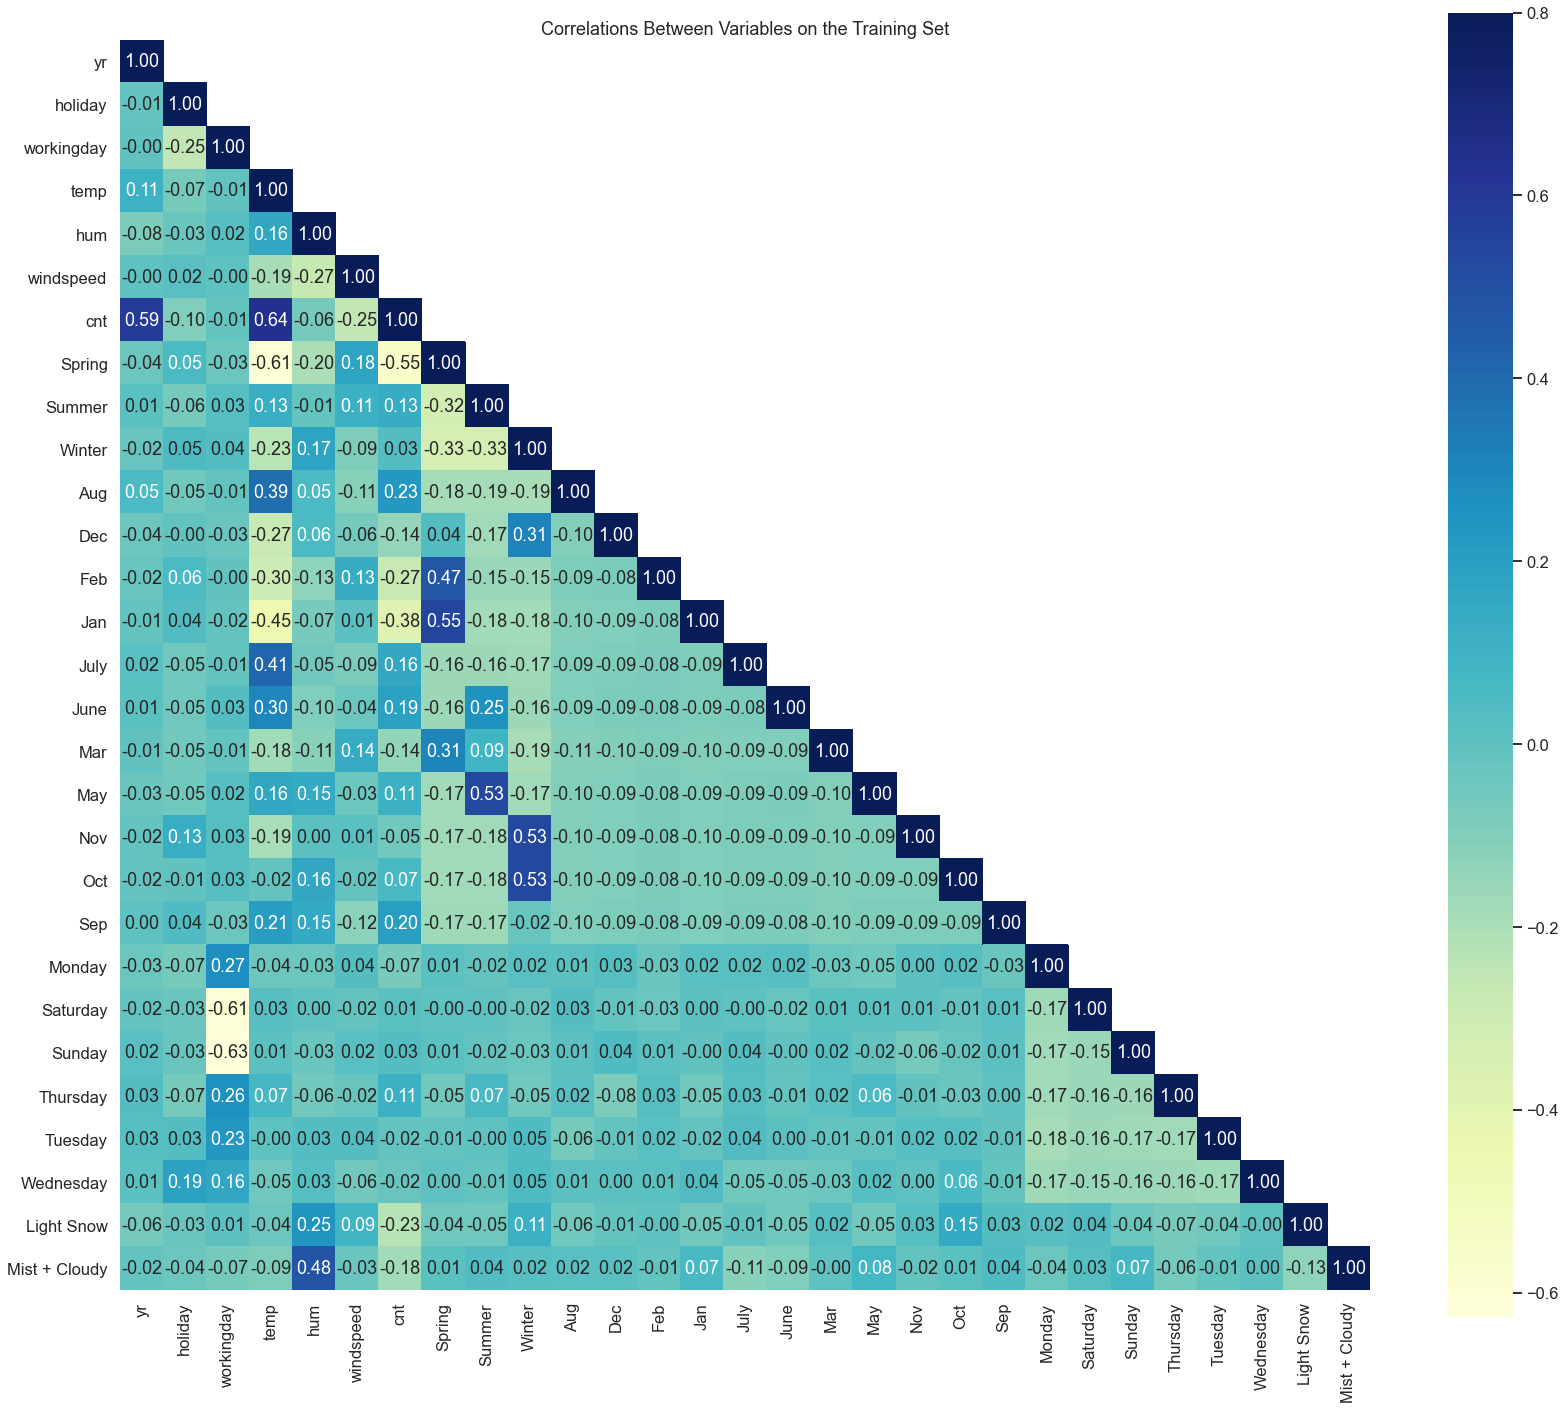

In [55]:
# Plotting heatmap to check on the correlation coefficients

plt.figure(figsize=(28,24))
mask = np.array(train.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(train.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu', fmt=".2f")

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables on the Training Set')
plt.show()

**Inferences:**
The Correlations for the Train data set are as follows:

`Top 5 Positive Correlations:`
1. Temp - cnt : 0.64
2. Yr - cnt : 0.59
3. Jan - Spring : 0.55
4. Oct - Winter : 0.55
5. Nov - Winter : 0.53

> The positive correlations indicates that if 1 variables is increase, the other variable will increase (moves in the same direction).

`Top 5 Negative Correlations:`
1. Sunday - workingday : -0.63
2. Saturday - workingday : -0.61
3. Spring - temp : -0.61
4. Spring - cnt : -0.55
5. Jan - temp : -0.45

> The negative correlations indicates the inversely relationship between both variables, where if 1 variable increase, the other 1 variable will decrease.

### Dividing Data set into X and Y

In [56]:
# Trained Target variable

y_train = train.cnt
x_train = train.drop('cnt', axis = 1)

### _Step 5: Building the Linear Model_

### Recursive Feature Elimination (RFE)

For our Model Building, we decided to go froward with the Mixed approach, whereby we will be applying **Recursive Feature Elimination / RFE** by selecting 15 variables from our data. 

Then manually we will be removing each variable one-by-one based on its p-value and VIF before finding our best model.

In [57]:
# Applying LM

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [58]:
# Rows and columns for the train data

x_train.shape

(510, 28)

In [59]:
# Selecting total 15 variables for RFE selection

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [60]:
# The list of all of the variables selected and their ranking

list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

> **RFE Support** is True means the variable will be selected, and **RFE Ranking** will rank the variables according to its importance.

In [61]:
# Determining the columns with RFE selected variables

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [62]:
# The total values of selected variables

(rfe.support_ == True).sum()

15

In [63]:
# Determining the columns with RFE NOT selected variables

x_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [64]:
# The total values of NON selected variables

(rfe.support_ == False).sum()

13

### Building our Model using the statsmodel.

### **`MODEL 1`**

In [65]:
# Creating x_train_rfe with RFE selected variables

x_train_rfe = x_train[col]

In [66]:
# Add a constant variable

x_train_rfe = sm.add_constant(x_train_rfe)

# Running the Linear Model

lm = sm.OLS(y_train, x_train_rfe).fit()

In [67]:
# Summary of the 1st Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.34e-189
Time:                        11:01:11   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

>> Our R-Squared for this Model is 84.5%. There are couple variables with quite a bit high of p-value, we will decide further once we look into the VIF of the variables.

#### Checking VIF

* VIF determines the correlations between the independent variables. The good Vif for the variable shall be less than <= 5. The closer the R-Squared to 1, the higher the value of VIF and multicollinearity.

In [68]:
# Calculating the VIF for the model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features    VIF
0           const  82.48
6          Spring   5.27
3            temp   4.42
8          Winter   3.83
7          Summer   2.76
4             hum   1.93
12            Nov   1.76
10            Jan   1.68
15  Mist + Cloudy   1.57
9             Dec   1.49
11           July   1.49
13            Sep   1.34
14     Light Snow   1.26
5       windspeed   1.21
1              yr   1.04
2         holiday   1.03


In [69]:
x_train_rfe = x_train_rfe.drop(['const'], axis=1)

In [70]:
# Checking VIF after dropping const

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features    VIF
3             hum  30.94
2            temp  17.80
4       windspeed   4.72
5          Spring   4.37
7          Winter   4.06
6          Summer   2.81
14  Mist + Cloudy   2.32
0              yr   2.09
11            Nov   1.83
9             Jan   1.75
10           July   1.59
8             Dec   1.55
12            Sep   1.41
13     Light Snow   1.28
1         holiday   1.06


>> In our 1st Model, we can see that all of our variables has an acceptable p-values < 0.05, then we will be checking our VIF to check for multicollinearity, hence we will drop the **hum** variable due it its significantly high VIF value = 30.94.

### **`MODEL 2`**

In [71]:
# Drop the 'hum' variable

x_train_rfe1 = x_train_rfe.drop(['hum'], axis = 1)


In [72]:
# Rebuilding the 2nd model

# Add a constant variable

x_train_lm = sm.add_constant(x_train_rfe1)

# Running the Linear Model

lm = sm.OLS(y_train, x_train_lm).fit()

In [73]:
# Summary of the 2nd Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.57e-186
Time:                        11:01:11   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

##### Checking VIF

In [74]:
# VIF for the 2nd Model

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,July,1.59
13,Mist + Cloudy,1.56


>> * Our R-Squared for our 2nd model is 0.840.
>> For the next model, we will be dropping **'Summer'** variable. Since there are still VIF values which is > 5.0, thus we will be removing our variable to find the acceptable model.

### **`MODEL 3`**

In [75]:
# Drop the Summer variable

x_train_rfe1 = x_train_rfe1.drop(['Summer'], axis = 1)


In [76]:
# Rebuilding the 3rd model

# Add a constant variable

x_train_lm = sm.add_constant(x_train_rfe1)

# Running the Linear Model

lm3 = sm.OLS(y_train, x_train_lm).fit()

In [77]:
# Summary of the 3rd Linear Model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.08e-186
Time:                        11:01:11   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2893      0.025     11.427

##### Checking VIF

In [78]:
# VIF for the 3rd Model

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,Winter,2.54
4,Spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist + Cloudy,1.53
6,Dec,1.46
8,July,1.36


>> * R-squared values for our 3rd model is 0.838.
>> We will be removing **'Nov'** further, to find the best model.

### **`MODEL 4`**


In [79]:
# Dropping Nov

x_train_rfe1 = x_train_rfe1.drop(['Nov'], axis = 1)

In [80]:
# Rebuilding the 4th model

# Add a constant variable

x_train_lm = sm.add_constant(x_train_rfe1)

# Running the Linear Model

lm4 = sm.OLS(y_train, x_train_lm).fit()

In [81]:
# Summary of the 4th Linear Model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.02e-186
Time:                        11:01:11   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2769      0.025     11.074

In [82]:
# VIF for the 4th Model

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,Spring,2.36
0,yr,2.06
5,Winter,1.64
7,Jan,1.64
11,Mist + Cloudy,1.53
8,July,1.36
6,Dec,1.29
9,Sep,1.20


>> For the 4th Model, our R-Squared is 0.836. We will be removing **Dec** with p-value of 0.037. We will still removing one-by-one till we satisfied with out model.

### **`MODEL 5`**

In [83]:
# Dropping 'Dec'

x_train_rfe1 = x_train_rfe1.drop(['Dec'], axis = 1)

In [84]:
# Rebuilding the 5th model

# Add a constant variable

x_train_lm = sm.add_constant(x_train_rfe1)

# Running the Linear Model

lm5 = sm.OLS(y_train, x_train_lm).fit()

In [85]:
# Summary of the 5th Linear Model

print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.13e-186
Time:                        11:01:11   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2657      0.025     10.843

In [86]:
# VIF for the 5th Model

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,Spring,2.25
0,yr,2.06
6,Jan,1.60
10,Mist + Cloudy,1.53
5,Winter,1.40
7,July,1.36
8,Sep,1.20
9,Light Snow,1.08


>> Our R-Squared decrease slightly from 0.836 to 0.835. Howver, we will still be removing our variable. Next is **Jan**.

### **`MODEL 6`**

In [87]:
# Drop the 'Jan' column

x_train_rfe1 = x_train_rfe1.drop(['Jan'], axis = 1)

In [88]:
# Rebuilding the 6th model

# Add a constant variable

x_train_lm = sm.add_constant(x_train_rfe1)

# Running the Linear Model

lm6 = sm.OLS(y_train, x_train_lm).fit()

In [89]:
# Summary of the 6th Linear Model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.16e-186
Time:                        11:01:11   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.024     10.530

In [90]:
# VIF for the 6th Model

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,Spring,1.65
9,Mist + Cloudy,1.51
5,Winter,1.40
6,July,1.35
7,Sep,1.20
8,Light Snow,1.08
1,holiday,1.04


**From our above model, we can see that the above model is acceptable due to the following reasons:**

* R-Squared is **0.833 (83.3%)**

> *This explained the variance of the target variable **`(cnt)`**.*
    
    
* Adj R-Squared is **0.30 (83.0%)**


* P-values for all of the 10 variables are equivalent to **0.** 

* VIF values are **less than 5.** 

* F-statistic is **248.7** ( greater than 1) and Prob(F-statistic) is **1.16e-186** (very low).

> *The greater the value of F-Statistics, and the Prob is low indicates that the model is significant.*

* Finally, for this model, all of the p-values are equivalent to 0, and our VIF for all of the variables are less than 5.0. Thus we can say that this is our best model to proceed further.

In [91]:
# The coefficient values for our 6th Model with 10 variables are as follows:

lm6.params

const            0.251899
yr               0.234092
holiday         -0.098556
temp             0.451455
windspeed       -0.139817
Spring          -0.110795
Winter           0.047278
July            -0.072719
Sep              0.057705
Light Snow      -0.286408
Mist + Cloudy   -0.081133
dtype: float64

### Residual Analysis

Residual analysis is used by assessing the appropriateness of the linear regression model by defining the residuals and examining it by plotting the graphs.

In [92]:
y_train_pred = lm6.predict(x_train_lm)

In [93]:
# Checking the Residuals

res = y_train - y_train_pred

<Figure size 432x288 with 0 Axes>

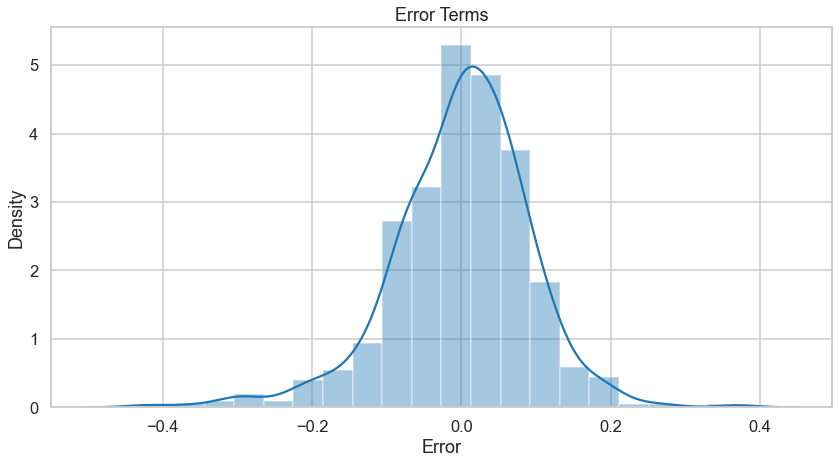

In [94]:
# Plotting the Histogram for the Residual

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((res), bins = 20)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Error Terms')
plt.xlabel('Error')
plt.show()

>**Inferences:**
    
    - From the above graphs, we can see that the Residuals are normally distributed and it centered towards 0. Thus it means that the model has a constant variance, HOMOSCEDASTICITY.

In [95]:
# Print R squared for train

r2_score(y_train, y_train_pred)

0.8328664237258241

### _`STEP 1. Making Predictions`_

### Applying Scalar on the Test sets

In [96]:
# Applying Scaler() to all of the numeric variables and fit on data

num_test = ['temp','hum','windspeed','cnt']
test[num_test] = scaler.transform(test[num_test])

In [97]:
# Checking whether the value is compressed between 0-1
# All of the max values are equals to 1

test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Tha values are all mapped to 0 - 1. And the max values for all of the variables are equal to 1.

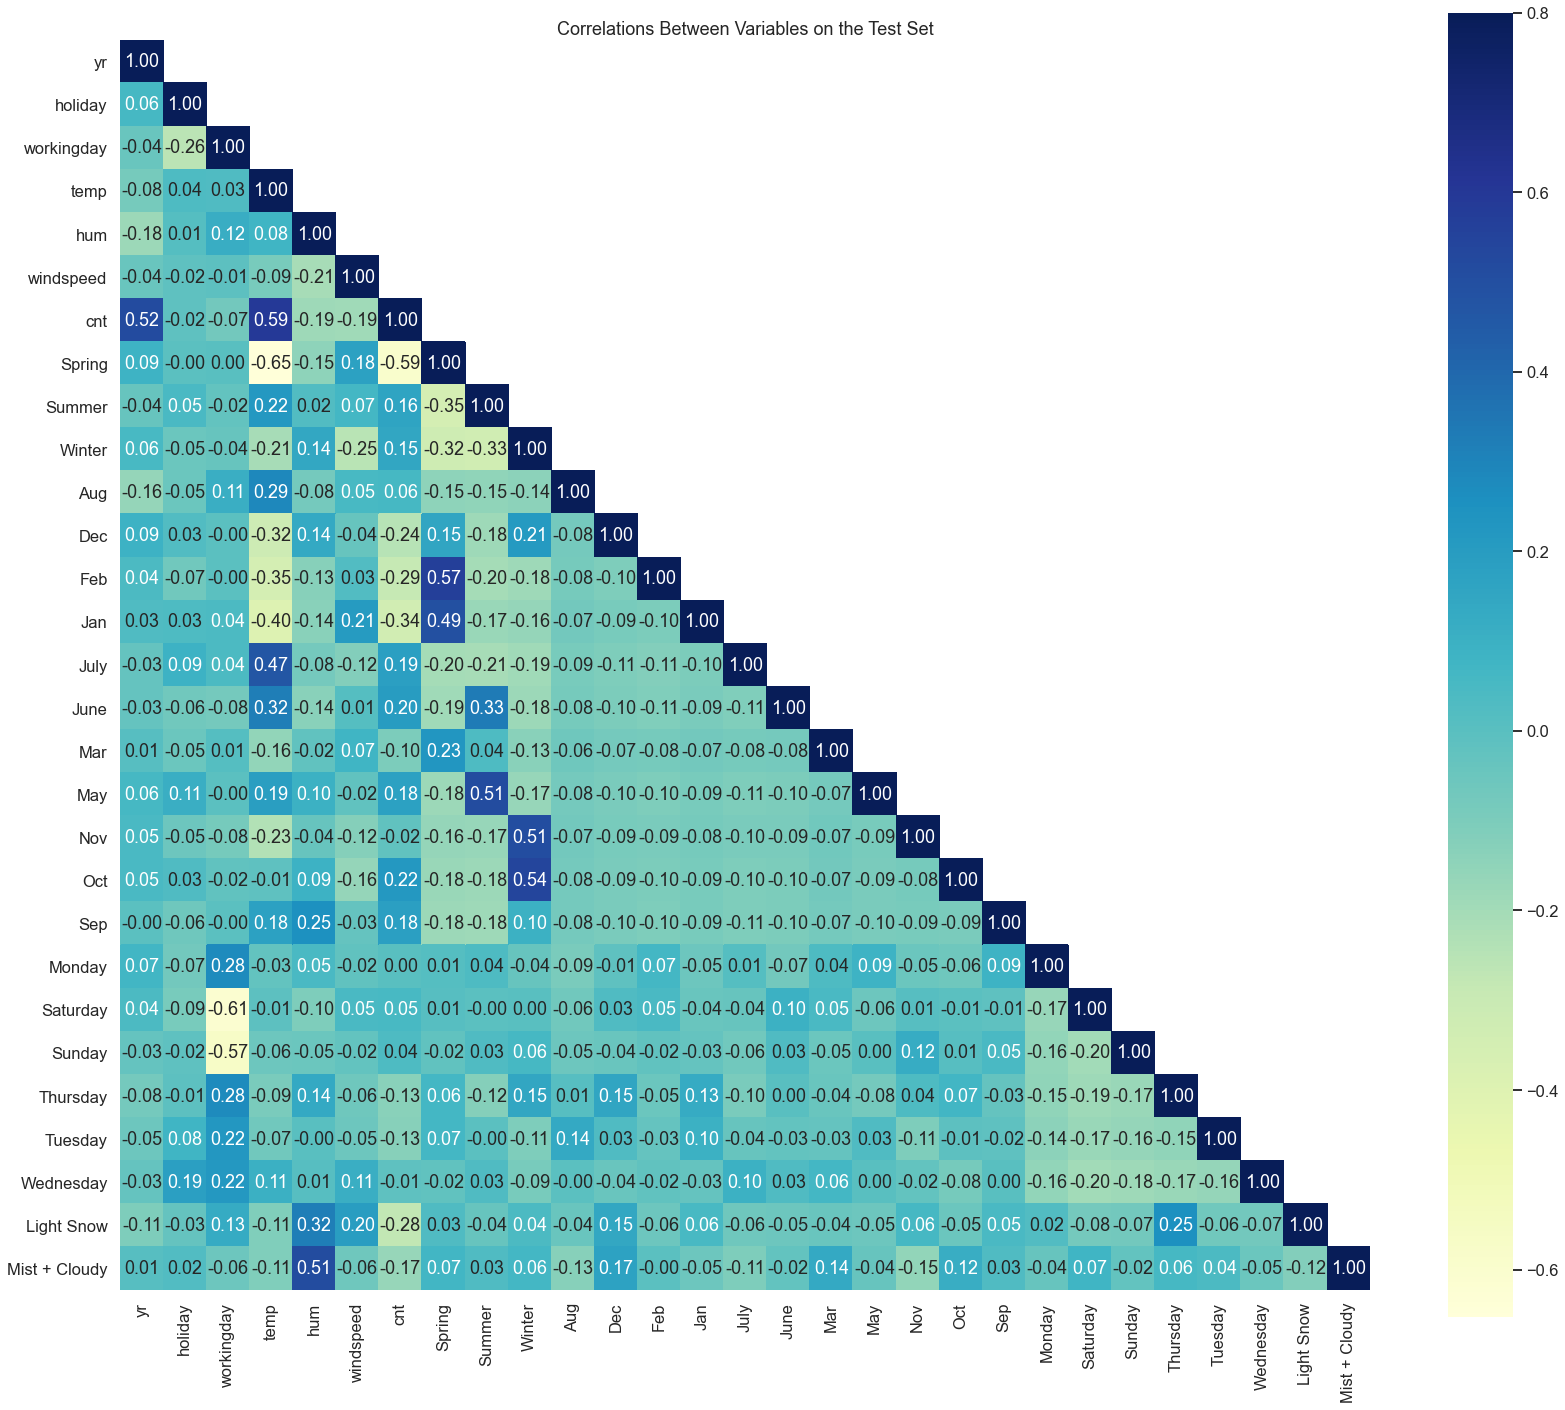

In [98]:
# Plotting heatmap to check on the correlation coefficients

plt.figure(figsize=(28,24))
mask = np.array(test.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(test.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu', fmt=".2f")

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables on the Test Set')
plt.show()

**Inferences:**
The Correlations for the Test data set are as follows:

**`Top 5 Positive Correlations:`**
1. Temp - cnt : 0.59
2. Feb - Spring : 0.57
3. Oct - Winter : 0.54
4. Nov - Winter : 0.51
5. Yr - cnt : 0.49

> The positive correlations indicates that if 1 variables is increase, the other variable will increase (moves in the same direction).

**`Top 5 Negative Correlations:`**
1. Spring - temp : -0.65
2. Saturday - workingday : -0.61
3. Spring - cnt : -0.59
4. Sunday - workingday : -0.57
5. Jan - temp : -0.40

> The negative correlations indicates the inversely relationship between both variables, where if 1 variable increase, the other 1 variable will decrease.

### Dividing into X-Test and Y-test

In [99]:
# Test columns

test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [100]:
# Creating X and Y for the Test

y_test = test.pop('cnt')
x_test = test

In [101]:
# Add a constant variable

x_test = sm.add_constant(x_test)

test_col = x_train_lm.columns
x_test = x_test[test_col[1:]]

x_test = sm.add_constant(x_test)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   Spring         219 non-null    uint8  
 6   Winter         219 non-null    uint8  
 7   July           219 non-null    uint8  
 8   Sep            219 non-null    uint8  
 9   Light Snow     219 non-null    uint8  
 10  Mist + Cloudy  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [102]:
# Making Predictions for the Test

y_pred = lm6.predict(x_test)


### Finding the R2, Adjusted R2 and Mean Squared Error

In [103]:
# R2 for our 6th Model

r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.807

In [105]:
n = x_test.shape[0]    # No. of rows of test data
p = x_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7967546001273603

In [ ]:
# Adjusted R2 for our 6th Model

Adj_r2 = 1 - (1 - 0.7836775)*(11-1)/(11-1-1)
round(Adj_r2,4)

In [ ]:
# Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
round(mse,4)

### RESULT COMPARISON:

* R-SQUARED (TRAIN) - **0.833 (83.3%)**
* R-SQUARED (TEST) - **0.807 (80.7%)**
* ADJ R-SQUARED (TRAIN) - **0.827 (82.7%)**
* ADJ R-SQUARED (TEST) - **0.7967 (79.67%)**

> The difference for R-Squared for Train and Test data is only **2.6%**. We can say that the value which is less than 5%, and this is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).


### _`STEP 7: Model Evaluation`_

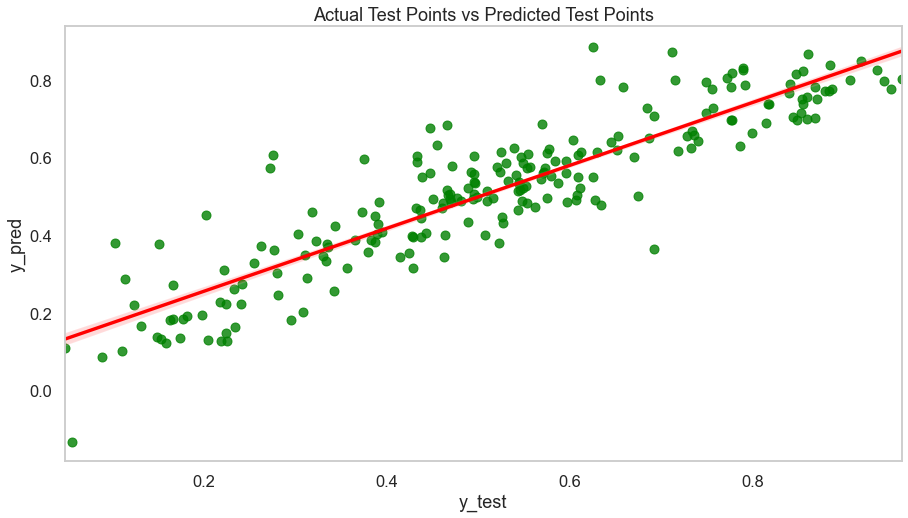

In [107]:
# Plotting scatter plot against Actual and Predicted Values

fig = plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Actual Test Points vs Predicted Test Points')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

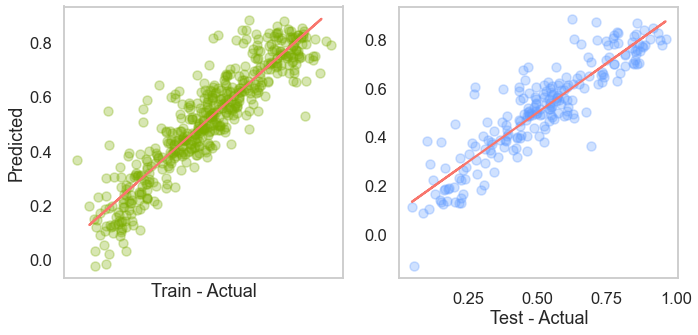

In [108]:
plt.figure(figsize=(11,5))

plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_train_pred, c="#7CAE00", alpha=0.3)

plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

z = np.polyfit(y_train, y_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted')
plt.xlabel('Train - Actual')

plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.xlabel('Test - Actual')

plt.show()

### _**EQUATION OF BEST FITTED LINE:**_
    
>**cnt** = 0.2519 +  0.2340(**`yr`**) + (-0.0986)(**`holiday`**) + 0.4515(**`temp`**) + (-0.1398)(**`windspeed`**) + (-0.1108)(**`Spring`**) + 0.04272(**`winter`**) + 0.0577(**`Sep`**) + (-0.2864)(**`Light Snow`**) + (-0.0811)(**`Mist + Cloudy`**)

* All of the coefficients with positive values indicates that they are positively correlated, means the value of independant variables increase, the dependent variable also tends to increase.

* For the Negative coefficients, if the values of the independent variable increase, the dependent variable will decrease.

* If we would have started with Null Hypothesis that all coefficients are zero , then from summary of our 6th model, we see that none of the coeeficients is zero. 
>> Thus, we **reject our null hypothesis in favour of Alternate Hypothesis that our model is statistically significant.**

#### Significant Variables to predict the demand for shared bikes are:

- [X] Temperature / Temp
- [X] Yr
- [X] Sep
- [X] Winter
- [X] July
- [X] Mist + Cloudy
- [X] Holiday
- [X] Spring
- [X] Light Snow
- [X] Windspeed

### SUMMARY:

The 4 most significant variables which affecting the demand for bike sharing are:

- [X] Temperature - 0.4515
- [X] Year/ Yr - 0.2340
- [X] Sep - 0.0577
- [X] Winter - 0.0427

As all of these 4 variables provides positive coefficents with the target variable, thus in order to increase the demand, the 4 variables/ factors shall be highly considered before making any business decisions.

Hence, once the COVID situation is back to normal, in order to increase the sales and volume, the company may focus on these 4 factors.